**1. Завантажте набір даних Autos, як це показано в темі «Вступ до генерації ознак. Відбір ознак» в розділі «Поширені прийоми генерації ознак. Математичні перетворення».**

In [15]:
import pandas as pd
import pickle
import os
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_selection import mutual_info_regression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [29]:
with open('mod_05_topic_10_various_data.pkl', 'rb') as file:
    datasets = pickle.load(file)

In [30]:
autos = datasets['autos']
print(df_autos)
df_autos = pd.DataFrame(autos)
df_autos.to_csv(r'file.csv')

            make fuel_type aspiration  num_of_doors   body_style drive_wheels  \
0    alfa-romero       gas        std             2  convertible          rwd   
1    alfa-romero       gas        std             2  convertible          rwd   
2    alfa-romero       gas        std             2    hatchback          rwd   
3           audi       gas        std             4        sedan          fwd   
4           audi       gas        std             4        sedan          4wd   
..           ...       ...        ...           ...          ...          ...   
188        volvo       gas        std             4        sedan          rwd   
189        volvo       gas      turbo             4        sedan          rwd   
190        volvo       gas        std             4        sedan          rwd   
191        volvo    diesel      turbo             4        sedan          rwd   
192        volvo       gas      turbo             4        sedan          rwd   

    engine_location  wheel_

**2. Визначте перелік дискретних ознак (в широкому розумінні) для подальшого розрахунку показника взаємної інформації.**

In [31]:
unique_values = df_autos.nunique()
print(unique_values)

make                  21
fuel_type              2
aspiration             2
num_of_doors           2
body_style             5
drive_wheels           3
engine_location        2
wheel_base            50
length                71
width                 41
height                46
curb_weight          165
engine_type            5
num_of_cylinders       6
engine_size           40
fuel_system            7
bore                  38
stroke                36
compression_ratio      8
horsepower            56
peak_rpm              21
city_mpg              28
highway_mpg           30
price                178
dtype: int64


Після аналізу кількості унікальних значень для кожної ознаки в наборі даних, ми визначили наступний перелік дискретних ознак, які мають обмежену кількість категорій або можливих значень. Ці ознаки можна використовувати для розрахунку показника взаємної інформації або для подальшого кодування категорійних ознак.

#### Опис дискретних ознак:
1. **make** (21 унікальне значення): Виробник автомобіля.
2. **fuel_type** (2 унікальні значення): Тип палива (наприклад, бензин, дизель).
3. **aspiration** (2 унікальні значення): Тип наддуву (стандартний або турбований двигун).
4. **num_of_doors** (2 унікальні значення): Кількість дверей в автомобілі (2 або 4).
5. **body_style** (5 унікальних значень): Тип кузова (наприклад, кабріолет, седан, хетчбек).
6. **drive_wheels** (3 унікальні значення): Тип приводу (передній, задній або повний привід).
7. **engine_location** (2 унікальні значення): Розташування двигуна (переднє або заднє).
8. **engine_type** (5 унікальних значень): Тип двигуна (наприклад, рядний, V-подібний).
9. **num_of_cylinders** (6 унікальних значень): Кількість циліндрів в двигуні.
10. **fuel_system** (7 унікальних значень): Тип паливної системи (наприклад, інжектор, карбюратор).
11. **compression_ratio** (8 унікальних значень): Ступінь стиснення двигуна.

#### Примітки:
- **city_mpg** (28 унікальних значень) та **highway_mpg** (30 унікальних значень) можна трактувати як дискретні ознаки, якщо розглядати їх у контексті категорій (низький, середній, високий показники споживання пального).
- Ознаки, такі як **wheel_base**, **length**, **curb_weight**, **engine_size**, **bore**, **stroke**, **horsepower** та **price**, мають багато унікальних значень і є неперервними. Тому їх не можна вважати дискретними.

**3. Розрахуйте показник взаємної інформації для вхідних ознак і цільової змінної price за допомогою методу mutual_info_regression() з пакета sklearn.**

In [70]:
discrete_features = ['make', 'fuel_type', 'aspiration', 'num_of_doors', 'body_style',
                     'drive_wheels', 'engine_location', 'engine_type', 'num_of_cylinders', 
                     'fuel_system', 'compression_ratio']
continuous_features = ['wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 
                       'bore', 'stroke', 'horsepower', 'peak_rpm', 
                       'city_mpg', 'highway_mpg', 'price']
y = df_autos['price']

X_discrete = df_autos[discrete_features].apply(LabelEncoder().fit_transform)
X_continuous = df_autos[continuous_features]
X_encoded = pd.concat([X_discrete, X_continuous], axis=1)

mi = mutual_info_regression(X_encoded, y)
mi_results = pd.Series(mi, index=X_encoded.columns).sort_values(ascending=False)

print("Показники взаємної інформації для кожної ознаки:")
print(mi_results)

Показники взаємної інформації для кожної ознаки:
price                3.989299
curb_weight          0.915832
engine_size          0.907430
horsepower           0.899075
highway_mpg          0.883326
city_mpg             0.789162
width                0.682113
length               0.610988
wheel_base           0.584910
bore                 0.502302
fuel_system          0.469325
stroke               0.394209
height               0.359193
num_of_cylinders     0.338551
drive_wheels         0.332490
make                 0.254543
peak_rpm             0.211502
engine_type          0.151328
compression_ratio    0.133340
aspiration           0.087755
body_style           0.084490
fuel_type            0.047298
num_of_doors         0.011409
engine_location      0.000000
dtype: float64


**4. Побудуйте регресійну модель / ансамбль (наприклад, за допомогою обєкта RandomForestRegressorабоGradientBoostingRegressorз пакетаsklearn`) для ефективної оцінки важливості вхідних ознак, подібно до того, як ми це робили у темі «Дерева рішень. Важливість ознак в моделі» в розділі «Важливість ознак у моделі».**

In [71]:
all_features = discrete_features + continuous_features
X = X_encoded

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

importances = model.feature_importances_
rf_importance = pd.Series(importances, index=all_features).sort_values(ascending=False)

print("Важливість ознак у моделі RandomForestRegressor:")
print(rf_importance)

Важливість ознак у моделі RandomForestRegressor:
price                0.949923
engine_size          0.037227
horsepower           0.003042
curb_weight          0.001933
height               0.001434
highway_mpg          0.001354
length               0.000859
stroke               0.000748
city_mpg             0.000612
bore                 0.000545
wheel_base           0.000375
engine_type          0.000351
body_style           0.000343
width                0.000305
peak_rpm             0.000303
compression_ratio    0.000190
make                 0.000137
num_of_doors         0.000083
num_of_cylinders     0.000081
aspiration           0.000078
fuel_system          0.000021
engine_location      0.000021
drive_wheels         0.000018
fuel_type            0.000018
dtype: float64


**5. Масштабуйте / уніфікуйте різні за своєю природою показники взаємної інформації та важливості ознак у моделі за допомогою методу .rank(pct=True) об’єкта DataFrame з пакета pandas.**

In [72]:
combined_importance = pd.DataFrame({
    'Mutual Information': mi_results,
    'Feature Importance': rf_importance
})

scaled_importance = combined_importance.rank(pct=True).sort_values(by='Mutual Information', ascending=False)

print("Масштабовані показники:")
print(scaled_importance)

Масштабовані показники:
                   Mutual Information  Feature Importance
price                        1.000000            1.000000
curb_weight                  0.958333            0.875000
engine_size                  0.916667            0.958333
horsepower                   0.875000            0.916667
highway_mpg                  0.833333            0.791667
city_mpg                     0.791667            0.666667
width                        0.750000            0.458333
length                       0.708333            0.750000
wheel_base                   0.666667            0.583333
bore                         0.625000            0.625000
fuel_system                  0.583333            0.166667
stroke                       0.541667            0.708333
height                       0.500000            0.833333
num_of_cylinders             0.458333            0.250000
drive_wheels                 0.416667            0.083333
make                         0.375000           

In [73]:
scaled_importance_long = scaled_importance.reset_index().melt(id_vars='index', 
                                                              var_name='Metric', 
                                                              value_name='Scaled Value')

**6. Побудуйте візуалізацію типу grouped barsplots для порівняння обох наборів за допомогою методу catplot() з пакета seaborn.**

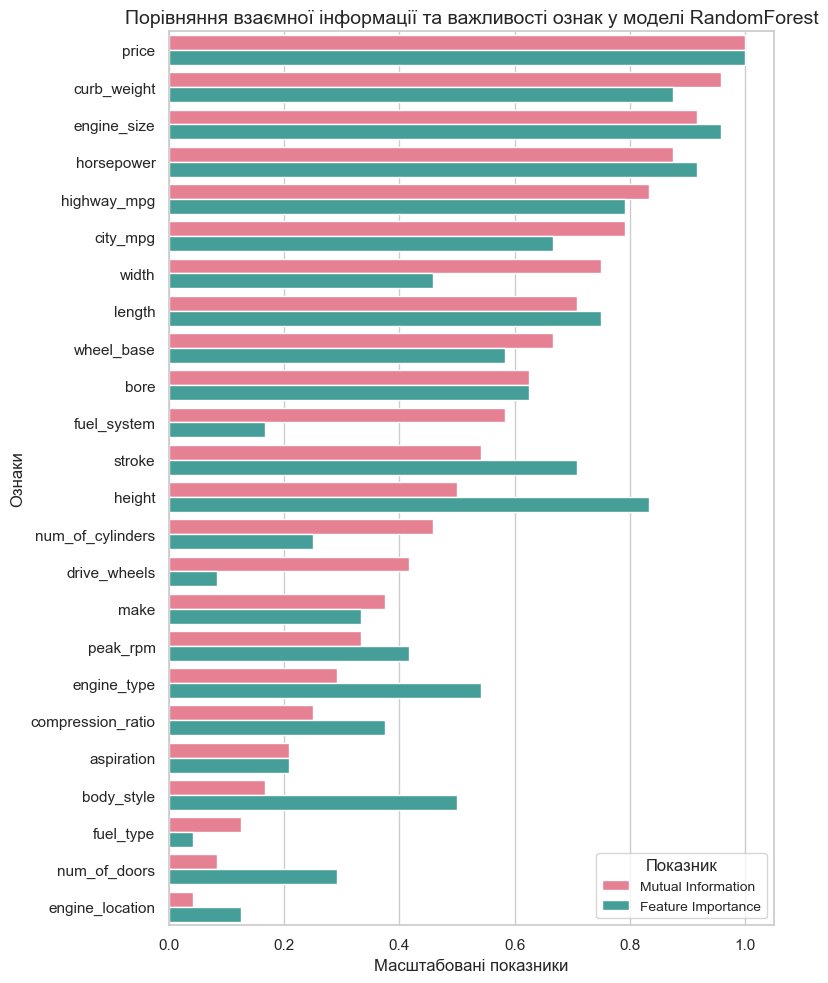

In [74]:
sns.set(style="whitegrid")
plt.figure(figsize=(8,10))

sns.barplot(
    data=scaled_importance_long, 
    x='Scaled Value', 
    y='index', 
    hue='Metric',
    palette="husl"
)

plt.title('Порівняння взаємної інформації та важливості ознак у моделі RandomForest', fontsize=14)
plt.ylabel('Ознаки')
plt.xlabel('Масштабовані показники')
plt.legend(title="Показник", loc="best", fontsize=10)

plt.tight_layout()
plt.show()

**7. Проаналізуйте візуалізацію та зробіть висновки.**

### Висновки з візуалізації:

1. **Найважливіші ознаки (висока важливість за обома методами)**:
   - Ознаки`curb_weight`, `engine_size` та `horsepower` є найбільш значущими як за показниками взаємної інформації, так і за важливістю в моделі RandomForest. Ці ознаки відіграють важливу роль у передбаченні цільової змінної (ціни), оскільки обидва методи присвоюють їм високий ранг.

2. **Ознаки середньої важливості**:
   - Такі ознаки, як `highway_mpg`, `city_mpg`, `width`, `length`, `wheel_base`, `bore` та `stroke`, мають помірну важливість за обома методами, з деякими відмінностями між ними. Вони є впливовими, але не настільки критичними, як найважливіші ознаки.

3. **Розбіжності між методами**:
   - Ознаки, такі як `engine_type` та `height`, мають вищу важливість у моделі RandomForest, тоді як взаємна інформація вказує на їхню меншу значущість. Це свідчить про те, що ці ознаки можуть бути кориснішими в рамках взаємодії з іншими ознаками в моделі дерев рішень, ніж при прямій кореляції з цільовою змінною.
   - Водночас ознака `fuel_system` демонструє значну різницю: за взаємною інформацією вона є відносно важливою, але RandomForest присвоює їй значно нижчу важливість. Це вказує на те, що хоча ця ознака має певну кореляцію з цільовою змінною, вона може бути менш впливовою в моделі на основі дерев рішень.

4. **Менш важливі ознаки**:
   - Ознаки `engine_location`, `num_of_doors` та `fuel_type` мають дуже низьку важливість за обома методами, що свідчить про їх незначний внесок у передбачення ціни. Ці ознаки можна потенційно виключити або знизити їх пріоритет у моделі.

5. **Помітна ознака: Compression Ratio**:
   - Ознака `compression_ratio` демонструє середній ранг за обома підходами, що вказує на її певну роль, але не настільки значущу, як у інших ознак.

### Загальні висновки:

- **Відповідність між методами**: Загалом, як показники взаємної інформації, так і RandomForest узгоджуються щодо більшості найважливіших ознак (`price`, `curb_weight`, `engine_size`, `horsepower`), що свідчить про їх ключову роль у передбаченні ціни.
  
- **Різні перспективи**: Для деяких ознак, таких як `engine_type`, `fuel_system`, та `height`, існують розбіжності між методами. Це може вказувати на те, що ці ознаки мають складніші взаємодії, які враховує модель RandomForest, але вони не мають сильної прямої кореляції з цільовою змінною.

- **Можливість зменшення розмірності**: Ознаки, які мають постійно низьку важливість, такі як `engine_location`, `num_of_doors`, та `fuel_type`, можуть бути розглянуті для видалення або зниження їх пріоритету в майбутніх моделях, оскільки вони не додають значної прогностичної сили.